Mean Squared Error: 0.8349639201706252
R² Score: 0.1324846243616984


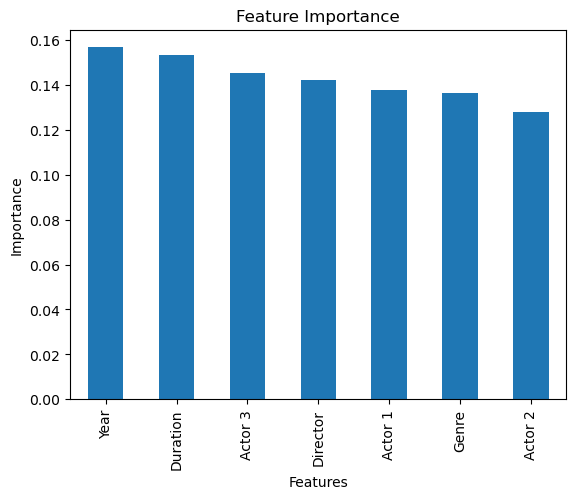

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("IMDb Movies India.csv", encoding='latin1')

# Handle missing values
df.fillna({
    'Genre': 'Unknown',
    'Director': 'Unknown',
    'Actor 1': 'Unknown',
    'Actor 2': 'Unknown',
    'Actor 3': 'Unknown',
    'Rating': df['Rating'].mean()
}, inplace=True)

# Encode categorical features
label = LabelEncoder()
for col in ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    df[col] = label.fit_transform(df[col])

# Clean the 'Year' column (remove parentheses and non-numeric characters)
df['Year'] = df['Year'].astype(str).str.extract('(\d{4})')   # extracts 4-digit year
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Year'] = df['Year'].fillna(df['Year'].median())

# Clean the 'Duration' column (remove 'min' and convert to number)
df['Duration'] = df['Duration'].astype(str).str.replace(' min', '', regex=False)
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')
df['Duration'] = df['Duration'].fillna(df['Duration'].median())


# Define features (X) and target (y)
X = df[['Year', 'Duration', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']]
y = df['Rating']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

# Feature importance visualization
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', title='Feature Importance')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()